# imports

In [1]:
import torch
import torch.utils.data
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# data set

In [3]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 1000)[:, None]
outputs = np.sin(inputs) + 0.05*np.random.normal(size=[len(inputs), 1])
data = list(zip(inputs, outputs))

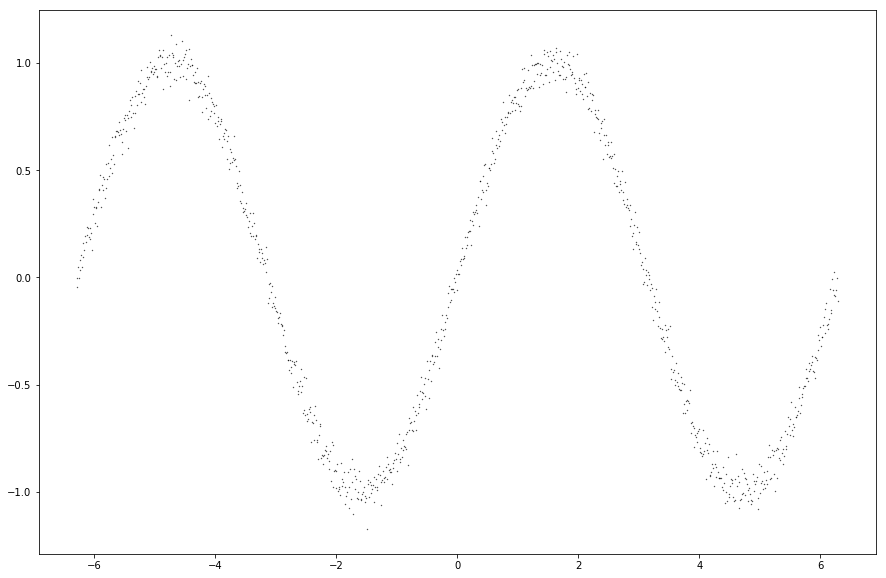

In [4]:
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

# model

In [5]:
class Model(nn.Module):
    
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim):
        
        super(Model, self).__init__()
        
        self.hl1 = nn.Linear(input_dim, hidden1_dim)
        self.hl1a = nn.ReLU()
        self.layer1 = [self.hl1, self.hl1a]
        
        self.hl2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.hl2a = nn.ReLU()
        self.layer2 = [self.hl2, self.hl2a]
        
        self.ol = nn.Linear(hidden2_dim, output_dim)
        self.ola = (lambda x: x)
        self.layer3 = [self.ol, self.ola]
        
        self.layers = [self.layer1, self.layer2, self.layer3]
        
    def forward(self, x):
        
        out = x
        
        for pa, a in self.layers:
            
            out = a(pa(out))
        
        return out

In [6]:
model = Model(1, 20, 20, 1)
model.double()

Model(
  (hl1): Linear(in_features=1, out_features=20, bias=True)
  (hl1a): ReLU()
  (hl2): Linear(in_features=20, out_features=20, bias=True)
  (hl2a): ReLU()
  (ol): Linear(in_features=20, out_features=1, bias=True)
)

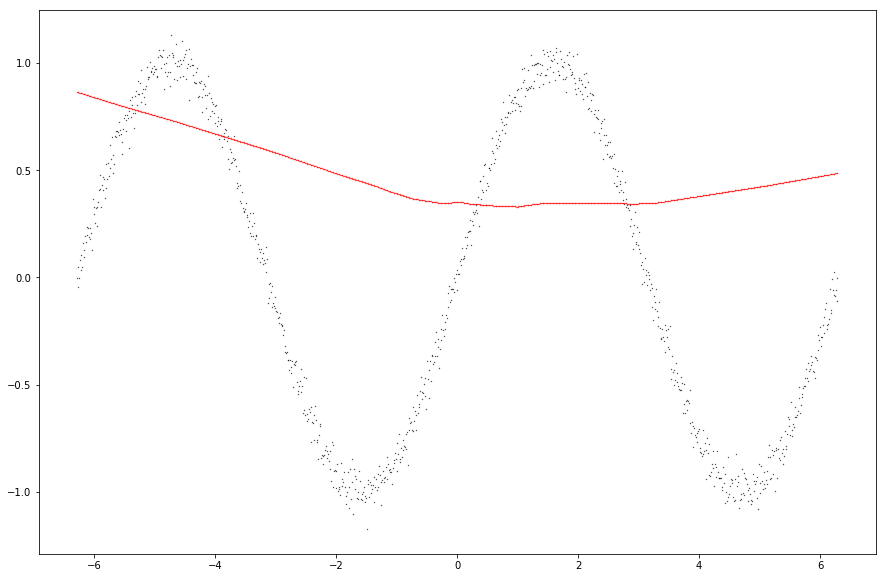

In [7]:
plt.scatter(inputs, outputs, c='k', marker='o', s=0.1)
plt.scatter(inputs, model(torch.tensor(inputs)).detach().numpy().flatten(), c='r', marker='o', s=0.1)

# trainer

In [8]:
class Trainer():
    
    def __init__(self, model, data):
        
        self.model = model
        self.data = data
        
        self.train_loader = torch.utils.data.DataLoader(dataset=self.data, batch_size=8, shuffle=True)
        
    def train(self, lr, ne):
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=lr, momentum=0.1)

        self.model.train()
        
        self.costs = []
        
        for e in range(ne):
            
            print('training epoch %d / %d ...' %(e+1, ne))
            
            train_cost = 0
        
            for batch_idx, (inputs, targets) in enumerate(self.train_loader):

                inputs = Variable(inputs)
                targets = Variable(targets)

                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, targets)
                train_cost += loss
                loss.backward()
                optimizer.step()
                
            self.costs.append(train_cost/len(data))
            print('cost: %f' %(self.costs[-1]))

In [9]:
trainer = Trainer(model, data)

# learning

In [10]:
trainer.train(0.001, 500)

training epoch 1 / 500 ...
cost: 0.063899
training epoch 2 / 500 ...
cost: 0.051632
training epoch 3 / 500 ...
cost: 0.049704
training epoch 4 / 500 ...
cost: 0.048557
training epoch 5 / 500 ...
cost: 0.047489
training epoch 6 / 500 ...
cost: 0.046399
training epoch 7 / 500 ...
cost: 0.045277
training epoch 8 / 500 ...
cost: 0.044146
training epoch 9 / 500 ...
cost: 0.042934
training epoch 10 / 500 ...
cost: 0.041717
training epoch 11 / 500 ...
cost: 0.040476
training epoch 12 / 500 ...
cost: 0.039226
training epoch 13 / 500 ...
cost: 0.037945
training epoch 14 / 500 ...
cost: 0.036655
training epoch 15 / 500 ...
cost: 0.035358
training epoch 16 / 500 ...
cost: 0.033995
training epoch 17 / 500 ...
cost: 0.032758
training epoch 18 / 500 ...
cost: 0.031415
training epoch 19 / 500 ...
cost: 0.030148
training epoch 20 / 500 ...
cost: 0.028878
training epoch 21 / 500 ...
cost: 0.027527
training epoch 22 / 500 ...
cost: 0.026375
training epoch 23 / 500 ...
cost: 0.025130
training epoch 24 / 

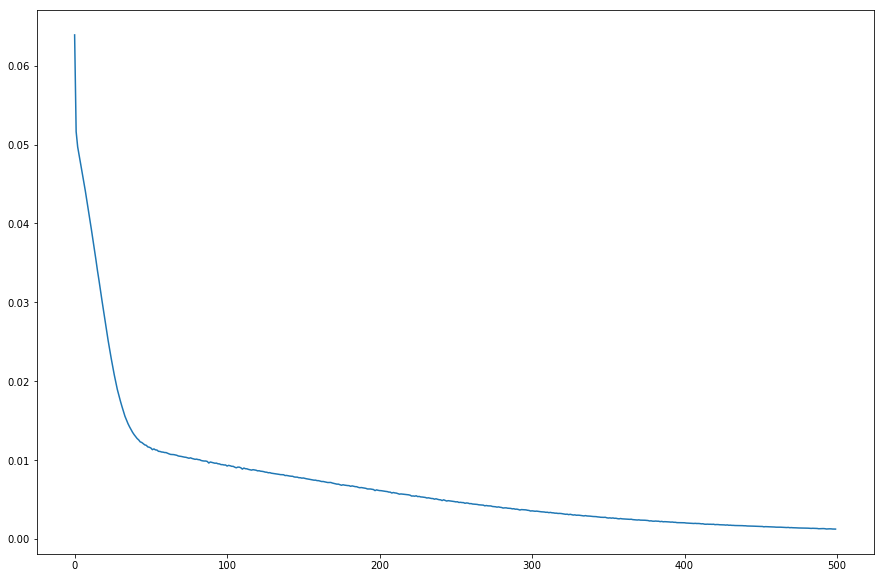

In [11]:
plt.plot(range(len(trainer.costs)), trainer.costs)

# results

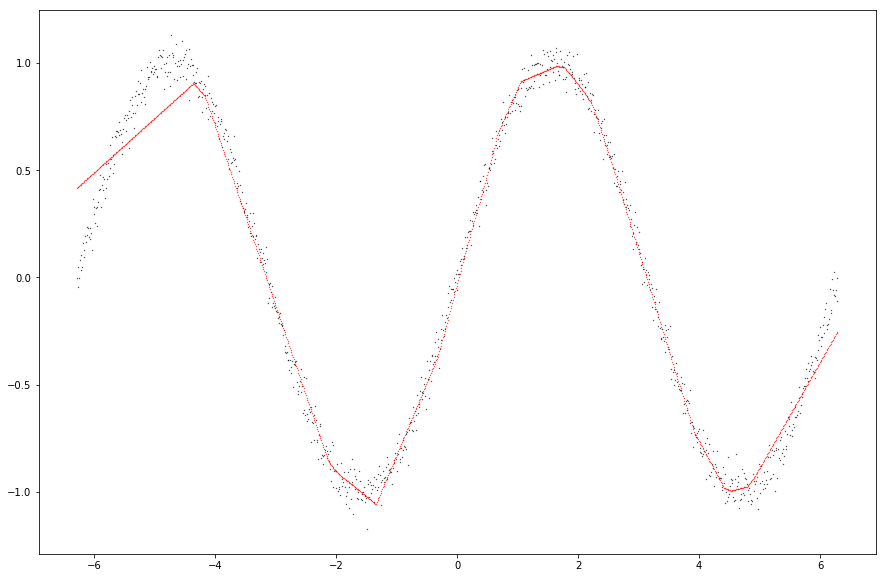

In [12]:
plt.scatter(inputs, outputs, c='k', marker='o', s=0.1)
plt.scatter(inputs, model(torch.tensor(inputs)).detach().numpy().flatten(), c='r', marker='o', s=0.1)